In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy

# 연습문제 3.2

### Classical Gram-Schmidt Algorithm

In [2]:
def clgs(A):
    m, n = A.shape
    V = A
    Q = np.eye(m,n)
    R = np.zeros((n,n))
    for j in range(0,n):
        for i in range(0,j-1):
            R[i,j] = np.dot(Q[:,i].T,A[:,j])
            V[:,j] = V[:,j] - np.dot(R[i,j],Q[:,i])
        R[j,j] = np.linalg.norm(V[:,j])
        Q[:,j] = V[:,j]/R[j,j]
    return Q, R

In [3]:
mat = np.array([[-3,2],[-1,4],[1,-3]], dtype=float)
Q, R = clgs(mat)
np.dot(Q,R)

array([[-3.,  2.],
       [-1.,  4.],
       [ 1., -3.]])

### Modified Gram-Schmidt Algorithm

In [4]:
def mgs(A):
    m, n = A.shape
    Q = A
    R = np.zeros((n,n))
    for i in range(0,n):
        R[i,i] = np.linalg.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i,i]
        R[i,i+1:] = np.dot(Q[:,i].T, Q[:,i+1:])
        Q[:,i+1:] = Q[:,i+1:] - np.outer(Q[:,i], R[i,i+1:])
    #R[n-1,n-1] = np.linalg.norm(Q[:,n-1])
    #Q[:,n-1] = Q[:,n-1]/R[n-1,n-1]
    return Q,R

In [5]:
mat = np.array([[-3,2],[-1,4],[1,-3]], dtype=float)
Q, R = mgs(mat)
np.dot(Q,R)

array([[-3.,  2.],
       [-1.,  4.],
       [ 1., -3.]])

In [6]:
R

array([[ 3.31662479, -3.91964748],
       [ 0.        ,  3.69274473]])

### Householder QR Decomposition

In [171]:
def qrhouse(A):
    m, n = A.shape
    R = A.copy()
    V = np.zeros((m,n))
    for k in range(0,n):
        x = R[k:,k]
        v = x + np.sign(x[0])*np.linalg.norm(x)*np.eye(len(x),1)[:,0]
        V[k:,k] = v
        R[k:,k:] = R[k:,k:] - 2*np.matmul(np.outer(v,v),R[k:,k:])/(np.dot(v,v))
    R = np.triu(R[:n,:])
    return V, R

def formQ(V):
    m, n = V.shape
    Q = np.eye(m,n)
    for j in range(n-1,-1,-1):
        v = V[:,j]
        Q = Q - 2 * np.matmul(np.outer(v, v), Q) / np.dot(v, v)
    return Q

In [148]:
def Qtb(V,b):
    m, n = V.shape
    for j in range(0,n):
        v = V[j:m+1,j]
        b[j:m+1] = b[j:m+1]- 2*np.matmul(np.outer(v,v),b[j:m+1])/(np.dot(v,v))
    c = b
    return c

In [126]:
A = np.array([[1,3,1],[2,-5,-2],[2,-4,-3]],dtype=float)
V, R = qrhouse(A)
Q = formQ(V)

In [127]:
Q

array([[-0.33333333,  0.93333333,  0.13333333],
       [-0.66666667, -0.33333333,  0.66666667],
       [-0.66666667, -0.13333333, -0.73333333]])

In [128]:
R

array([[-3.,  5.,  3.],
       [ 0.,  5.,  2.],
       [ 0.,  0.,  1.]])

In [129]:
np.dot(Q,R)

array([[ 1.,  3.,  1.],
       [ 2., -5., -2.],
       [ 2., -4., -3.]])

### (a)

In [13]:
[U, X] = np.linalg.qr(np.random.randn(80,80))
[V, X] = np.linalg.qr(np.random.randn(80,80))

In [14]:
J = range(0,80)
J2 = [2**(-x) for x in J]
S = np.diag(J2)
A = np.dot(U,np.dot(S,V))

In [15]:
[Qc, Rc] = clgs(A)
[Qm, Rm] = mgs(A)

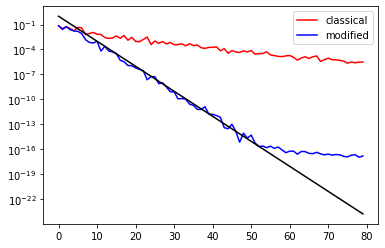

In [16]:
plt.semilogy(Rc.diagonal(), color='r')
plt.semilogy(Rm.diagonal(), color='b')
plt.semilogy(S.diagonal(), color='k')
plt.legend(('classical','modified'))

modified gram schmidt이 더 stable하다.

### (b)

In [17]:
A = np.array([[.70000, .70711],[.70001, .70711]])
[Qm, Rm] = mgs(A)
[V, R] = qrhouse(A)
Q = formQ(V)
a = np.dot(Q.T,Q) - np.eye(2,2)
b = np.dot(Qm.T,Qm) - np.eye(2,2)
print(np.linalg.norm(a))
print(np.linalg.norm(b))
e1 = abs(np.linalg.norm(a) - 0)
e2 = abs(np.linalg.norm(b) - 0)
print('low error:', min(e1,e2))

2.3411870786352597e-16
3.254738863228859e-11
low error: 2.3411870786352597e-16


householder이 더 stable하다.

# 연습문제 3.3

In [18]:
def qrgivens(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A
    
    for j in range(0,n):
        for i in range(m-1, j, -1):
            G = np.eye(m)
            [c,s] = givensrotation(R[i-1,j], R[i,j])
            G[i-1, i-1] = c
            G[i-1, i] = -s
            G[i, i-1] = s
            G[i, i] = c
            
            Q = np.dot(Q, G)
            R = np.dot(G.T, R)
            
    return Q[:, :n], np.triu(R[:n, :])

def givensrotation(a, b):
    if b == 0:
        c = 1
        s = 0
    else:
        if abs(b) > abs(a):
            r = a/b
            s = 1/np.sqrt(1+r**2)
            c = s*r
        else:
            r = b/a
            c = 1/np.sqrt(1+r**2)
            s = c*r
    return c, s

In [19]:
A = np.array([[1,3],[2,-5],[2,-4]], dtype='float')
Q, R = qrgivens(np.copy(A))

In [20]:
Q

array([[ 0.33333333, -0.93333333],
       [ 0.66666667,  0.33333333],
       [ 0.66666667,  0.13333333]])

In [21]:
R

array([[ 3., -5.],
       [ 0., -5.]])

In [22]:
np.dot(Q,R)

array([[ 1.,  3.],
       [ 2., -5.],
       [ 2., -4.]])

# 연습문제 4.3

In [89]:
def produce(m):
    A = (np.random.randn(m,m))/np.sqrt(m)
    A = A.astype('f')
    return A

def produce_tri(m):
    A = (np.random.randn(m,m))/np.sqrt(m)
    A = A.astype('f')
    A = np.triu(A)
    return A

def plot_eigen(m):
    global radius_list
    A = produce(m)
    evalue, evector = np.linalg.eig(A)
    for j in evalue:
        plt.scatter(np.real(j),np.imag(j), c='b', s=7)
    radius = max(evalue, key=abs)
    radius_list.append(radius)
    plt.scatter(np.real(radius), np.imag(radius), c='r', s=7)
    
def plot_eigen2(m):
    global radius_list
    A = produce_tri(m)
    evalue, evector = np.linalg.eig(A)
    for j in evalue:
        plt.scatter(np.real(j),np.imag(j), c='b', s=7)
    radius = max(evalue, key=abs)
    radius_list.append(radius)
    plt.scatter(np.real(radius), np.imag(radius), c='r', s=7)

### (a)

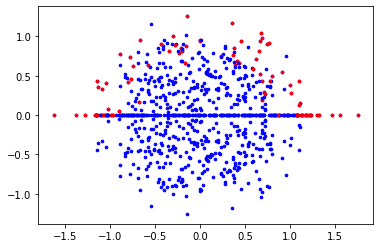

In [73]:
m = 8
radius_list = []

for i in range(100):
    plot_eigen(m)
    
plt.show()
r1 = radius_list

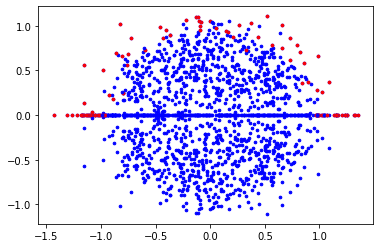

In [74]:
m = 16
radius_list = []

for i in range(100):
    plot_eigen(m)

plt.show()
r2 = radius_list

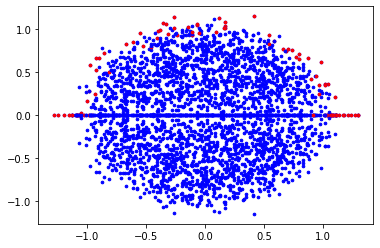

In [76]:
m = 32
radius_list = []

for i in range(100):
    plot_eigen(m)
    
plt.show()
r3 = radius_list

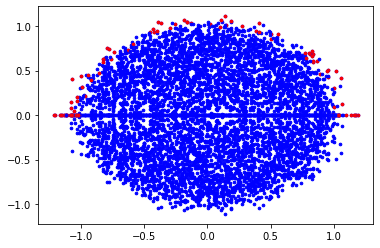

In [77]:
m = 64
radius_list = []

for i in range(100):
    plot_eigen(m)
    
plt.show()
r4 = radius_list

m이 커질수록, eigenvalue를 파란색으로 plot해보면 반지름이 1인 원 형태를 띈다.
빨간색으로 plot한 spectral radius (=max[eigenvalues]) 역시 1에 가까워지는 것을 확인할 수 있다.

### (b)

In [84]:
for i in range(0,7):
    m = (2**(i+1))*4
    A = produce(m)
    print(np.linalg.norm(A, ord=2))

1.7947676
1.797482
1.9477137
1.8939495
1.905005
1.9848194
1.9691737


m이 무한대로 갈수록 2-norm은 점점 2에 가까워짐을 알 수 있다.
spectral radius는 1로 가까워지기 때문에, inequality가 equality에 가까워지지는 않는다.

### (c)

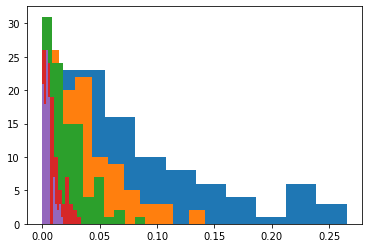

In [29]:
m = [8, 16, 32, 64, 128]

for i in m:
    a = []
    for j in range(100):
        A = produce(i)
        a.append(np.linalg.norm(A, ord=-2))
    a.sort()
    plt.hist(a)
plt.show()

m이 커짐에 따라 condition number의 크기가 매우 작아집을 확인할 수 있다. (m이 커질수록 파란색 -> 보라색으로 이동한다.)

### (d)

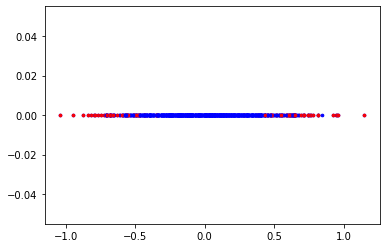

In [90]:
m=8

for i in range(100):
    plot_eigen2(m)
    
plt.show()

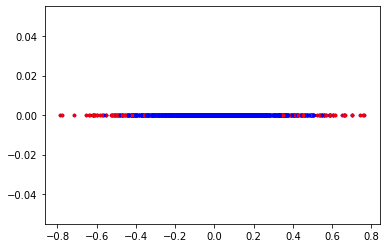

In [91]:
m = 16

for i in range(100):
        plot_eigen2(m)
        
plt.show()

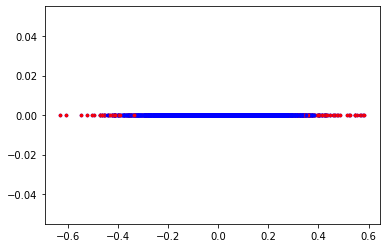

In [92]:
m = 32

for i in range(100):
    plot_eigen2(m)
    
plt.show()

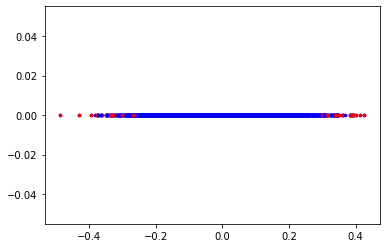

In [93]:
m = 64

for i in range(100):
    plot_eigen2(m)
    
plt.show()

In [34]:
for i in range(0,7):
    m = (2**(i+1))*4
    A = produce_tri(m)
    print(np.linalg.norm(A, ord=2))

1.5253401
1.4802349
1.4872103
1.5609938
1.5485833
1.6204672
1.6405547


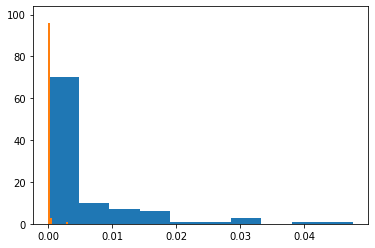

In [35]:
m = [8, 16, 32, 64, 128]

for i in m:
    a = []
    for j in range(100):
        A = produce_tri(i)
        a.append(np.linalg.norm(A, ord=-2))
    a.sort()
    plt.hist(a)

plt.show()

upper triangular matrix A에 대해 (a)~(c)의 코드를 그대로 돌려보았다. A가 삼각행렬일 때 eigengalue를 plot해본 결과 모두 실수임을 확인할 수 있었다. condition number의 크기는 m이 증가함에 따라 매우 빠른 속도로 작아졌다.

# 연습문제 4.6

In [284]:
t = np.linspace(0, 1, 50)
b = np.cos(4*t)
A = np.vander(t)
A = np.fliplr(A)
A = A[:, :12]
ATA = np.dot(A.T,A)

In [304]:
x = np.zeros((12,6))

In [305]:
def forward_subs(G,b):
    x = []
    for i in range(len(b)):
        x.append(b[i])
        for j in range(i):
            x[i] -= (G[i][j]*x[j])
        x[i] = x[i]/G[i][i]
    return(x)

In [306]:
def back_subs(G,b):
    n = b.size
    x = np.zeros_like(b)
    if G[n-1, n-1] == 0:
        raise ValueError
    x[n-1] = b[n-1]/G[n-1, n-1]
    C = np.zeros((n,n))
    for i in range(n-2, -1, -1):
        b2 = 0
        for j in range(i+1, n):
            b2 += G[i, j]*x[j]

        C[i, i] = b[i] - b2
        x[i] = C[i, i]/G[i, i]
    return(x)

### (a)

In [307]:
B = np.dot(A.T,A)
L = np.linalg.cholesky(B)

In [308]:
w1 = forward_subs(L, np.dot(A.T,b))
w1 = np.array(w1)
w2 = back_subs(L.T, w1)

In [309]:
x[:,0] = w2

In [310]:
np.allclose(np.dot(A.T,b), np.dot(ATA,x[:,0]))

True

In [311]:
x[:,0]

array([ 9.99999990e-01,  3.00483764e-06, -8.00011122e+00,  1.60935260e-03,
        1.06545953e+01,  5.33952877e-02, -5.83825972e+00,  2.75733374e-01,
        1.27790755e+00,  3.12606357e-01, -5.02306058e-01,  1.11183155e-01])

### (b)

In [312]:
Q, R = mgs(A.copy())
x[:, 1] = np.linalg.solve(R, np.dot(Q.T,b))

np.allclose(np.dot(A.T,b), np.dot(ATA, x[:,1]))

True

In [313]:
x[:,1]

array([ 1.00000000e+00, -7.80741851e-07, -7.99996781e+00, -5.16377008e-04,
        1.06709431e+01, -2.06445282e-02, -5.62772565e+00, -1.10758970e-01,
        1.73549472e+00, -2.48104577e-02, -3.61374792e-01,  8.57179143e-02])

### (c)

In [314]:
V, R = qrhouse(np.copy(A))
Q = formQ(V)
xc = np.linalg.solve(R, np.matmul(Q.T, b))

In [315]:
x[:, 2] = xc

In [316]:
x[:,2]

array([ 1.00000000e+00, -4.22743354e-07, -7.99998124e+00, -3.18763360e-04,
        1.06694308e+01, -1.38202917e-02, -5.64707562e+00, -7.53160412e-02,
        1.69360698e+00,  6.03209511e-03, -3.74241698e-01,  8.80405751e-02])

In [317]:
np.allclose(np.dot(A.T,b), np.dot(ATA, x[:,2]))

True

### (d)

In [318]:
Q, R = np.linalg.qr(A)
x[:,3] = np.linalg.solve(R, np.dot(Q.T,b))

np.allclose(np.dot(A.T,b), np.dot(ATA, x[:,3]))

True

In [319]:
x[:,3]

array([ 1.00000000e+00, -4.22742762e-07, -7.99998124e+00, -3.18763193e-04,
        1.06694308e+01, -1.38202872e-02, -5.64707563e+00, -7.53160213e-02,
        1.69360696e+00,  6.03211095e-03, -3.74241704e-01,  8.80405762e-02])

### (e)

In [320]:
Q, R = np.linalg.qr(A)
y = np.dot(Q.T,b)
x4 = np.linalg.solve(R, y)
x[:,4] = x4

np.allclose(np.dot(A.T,b), np.dot(ATA, x[:,4]))

True

In [321]:
x[:,4]

array([ 1.00000000e+00, -4.22742762e-07, -7.99998124e+00, -3.18763193e-04,
        1.06694308e+01, -1.38202872e-02, -5.64707563e+00, -7.53160213e-02,
        1.69360696e+00,  6.03211095e-03, -3.74241704e-01,  8.80405762e-02])

### (f)

In [335]:
U, S, V = np.linalg.svd(A)
c = np.dot(U[:,:n].T,b)
Smat = np.diag(S)

for i in range(0,12):
    c[i] = c[i]/Smat[i,i]
    
x[:,5] = np.dot(V.T,c)
np.allclose(np.dot(A.T,b), np.dot(ATA, x[:,5]))

True

In [336]:
x[:,5]

array([ 1.00000000e+00, -4.22742789e-07, -7.99998124e+00, -3.18763202e-04,
        1.06694308e+01, -1.38202874e-02, -5.64707563e+00, -7.53160221e-02,
        1.69360696e+00,  6.03211047e-03, -3.74241704e-01,  8.80405762e-02])

### (g)

In [337]:
sympy.Matrix(x)

Matrix([
[  0.999999989666636,      1.00000000221909,       1.0000000009966,       1.0000000009966,       1.0000000009966,       1.0000000009966],
[3.00483764442733e-6,  -7.80741851430976e-7,  -4.22743353584761e-7,  -4.22742762308245e-7,  -4.22742762308245e-7,  -4.22742788638153e-7],
[  -8.00011122039215,     -7.99996781331556,     -7.99998123567563,     -7.99998123569015,     -7.99998123569015,     -7.99998123568934],
[0.00160935259772651, -0.000516377008261277, -0.000318763360448724, -0.000318763192593396, -0.000318763192593396, -0.000318763201606597],
[   10.6545953156615,      10.6709431163868,      10.6694307967821,      10.6694307956841,      10.6694307956841,      10.6694307957393],
[ 0.0533952877407528,   -0.0206445282131062,   -0.0138202916581374,   -0.0138202872244521,   -0.0138202872244521,   -0.0138202874288601],
[  -5.83825971887829,     -5.62772565108366,     -5.64707561761765,     -5.64707562918993,     -5.64707562918993,     -5.64707562870593],
[  0.275733373967491,    

모든 x해에 대해 np.allclose()를 통해 정규방정식을 만족함은 확인하였다. 그러나 파이썬 내장함수와 비교하여 약간씩의 오차는 존재했는데, qrhouse 함수와 normal equation을 통해 구한 값의 오차가 다른 경우에 비해 꽤 컸다.